# Efficienza Primo Rivelatore

# New Code
## Nuove misure prese con :
* dt = 150 ns (impostato a 0)
* delay = 5 ns

## Misura dell'Efficienza dei Rivelatori (updated to 4th December 2024)

Dimensioni rivelatori: ...



Questo notebook contiene la misura dell'efficienza dei tre scintillatori calcolata sfruttando le coincidenze doppie e triple mediante la formula:

$\epsilon_{riv} = \frac{N_{triple}}{N_{doppie}}$


Tensioni: 

I conteggi vengono effettuati ogni 5 minuti.

$\Delta t$ = 50 $ns$

WDT = 169

dt = 150 ns (impostato a 0)

delay = 5 ns (per tutti e tre i rivelatori)



* N.B.: Non si è tenuto conto delle coincidenze accidentali (il conteggio è stato fatto ed è un numero trascurabile rispetto al numero di conteggi singoli)


### Esempio: Efficienza del Primo Rivelatore

Sfruttiamo le coincidenze triple. Le coincidenze doppie sono relative al secondo e al terzo rivelatore: 




$N_{triple} = N_{\mu} \, \epsilon_1 \, \epsilon_2 \, \epsilon_3$,

$N_{doppie} = N_{\mu}\, \epsilon_2 \,\epsilon_3$ $=$ $N_{2,3} $ 

$\Rightarrow$ $\epsilon_1 = \frac{N_{triple}}{N_{2,3}} $

### N.B.: 
Per trovare il valore ottimale di Threshold, aspettiamo di scendere sotto al 90% di efficienza e ci fermiamo (con quel voltaggio)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# LateX font:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

## Studio dell'Efficienza dello Scintillatore 1

* Voltaggi degli Scintillatori 2 e 3:  $V = 1050 \,V$
* Threshold degli Scintillatori 2 e 3:  $Th = 70 \,meV$


Variamo il voltaggio e la threshold per trovare il punto in cui l'efficienza dello Scintillatore 1 è massima.

## Crea i dataframes :

In [5]:
# Rivelatore 1 : le doppie sono 2,3

data_1 = {
        'V [V]': np.full(1, 1000),
        'Th [meV]' : [0, ],
    
        'N_singole_1': [364097, ],
        'N_singole_2': [11546, ],
        'N_singole_3': [13923, ],
    
        'N_doppie_12' : [7217, ],
        'N_doppie_13' : [7504,],
        'N_doppie_23' : [6008, ],
    
        'N_triple' : [5975, ],
}
df_1= pd.DataFrame(data_1)

In [23]:
# Rivelatore 1 : le doppie sono 2,3

data_2 = {
        'V [V]': np.full(1, 1050),
        'Th [meV]' : [0, ],
    
        'N_singole_1': [],
        'N_singole_2': [],
        'N_singole_3': [],
    
        'N_doppie_12' : [],
        'N_doppie_13' : [],
        'N_doppie_23' : [],
    
        'N_triple' : [],
}
df_2 = pd.DataFrame(data_2)

In [24]:
# Rivelatore 1 : le doppie sono 2,3

data_3 = {
        'V [V]': np.full(1, 1100),
        'Th [meV]' : [0, ],
    
        'N_singole_1': [],
        'N_singole_2': [],
        'N_singole_3': [],
    
        'N_doppie_12' : [],
        'N_doppie_13' : [],
        'N_doppie_23' : [],
    
        'N_triple' : [],
}
df_3 = pd.DataFrame(data_3)

In [25]:
# Rivelatore 1 : le doppie sono 2,3

data_4 = {
        'V [V]': np.full(1, 1150),
        'Th [meV]' : [0, ],
    
        'N_singole_1': [],
        'N_singole_2': [],
        'N_singole_3': [],
    
        'N_doppie_12' : [],
        'N_doppie_13' : [],
        'N_doppie_23' : [],
    
        'N_triple' : [],
}
df_4 = pd.DataFrame(data_4)

In [156]:
data_5 = {
        'V [V]': np.full(1, 1200),
        'Th [meV]' : [],
    
        'N_singole_1': [],
        'N_singole_2': [],
        'N_singole_3': [],
    
        'N_doppie_12' : [],
        'N_doppie_13' : [],
        'N_doppie_23' : [],
    
        'N_triple' : [],
}
df_5 = pd.DataFrame(data_5)

In [ ]:
data_6 = {
        'V [V]': np.full(1, 1250),
        'Th [meV]' : [0, ],
    
        'N_singole_1': [],
        'N_singole_2': [],
        'N_singole_3': [],
    
        'N_doppie_12' : [],
        'N_doppie_13' : [],
        'N_doppie_23' : [],
    
        'N_triple' : [],
}
df_6 = pd.DataFrame(data_6)

In [7]:
# Calcola le coincidenze accidentali : 
delta_t = 50*10**(-9) # s

dataframes = [df_1]  # List of DataFrames
results = {}  # Dictionary to store results

for i, df in enumerate(dataframes, start=1):  # Loop through DataFrames with an index
    # Calculate double coincidences
    N_doppie_acc_12 = df['N_singole_1'] / (5 * 60) * df['N_singole_2'] / (5 * 60) * delta_t
    N_doppie_acc_13 = df['N_singole_1'] / (5 * 60) * df['N_singole_3'] / (5 * 60) * delta_t
    N_doppie_acc_23 = df['N_singole_2'] / (5 * 60) * df['N_singole_3'] / (5 * 60) * delta_t

    # Calculate triple coincidences
    N_triple_acc = (
        df['N_singole_1'] / (5 * 60) *
        df['N_singole_2'] / (5 * 60) *
        df['N_singole_3'] / (5 * 60) *
        delta_t * delta_t
    )

    # Store results in the dictionary
    results[f'df_{i}'] = {
        'N_doppie_acc_12': N_doppie_acc_12,
        'N_doppie_acc_13': N_doppie_acc_13,
        'N_doppie_acc_23': N_doppie_acc_23,
        'N_triple_acc': N_triple_acc,
    }


In [8]:
for df in dataframes:
    df['N_doppie_acc_12'] = df['N_singole_1'] / (5 * 60) * df['N_singole_2'] / (5 * 60) * delta_t
    df['N_doppie_acc_13'] = df['N_singole_1'] / (5 * 60) * df['N_singole_3'] / (5 * 60) * delta_t
    df['N_doppie_acc_23'] = df['N_singole_2'] / (5 * 60) * df['N_singole_3'] / (5 * 60) * delta_t
    df['N_triple_acc'] = (
        df['N_singole_1'] / (5 * 60) *
        df['N_singole_2'] / (5 * 60) *
        df['N_singole_3'] / (5 * 60) *
        delta_t * delta_t
    )

    # Errori : 
    
    df['epsilon_1'] = df['N_triple'] / df['N_doppie_23']
    df['sigma_epsilon_1'] = np.sqrt(
        df['epsilon_1'] / df['N_doppie_23'] * (1 - df['epsilon_1'])
    )

In [9]:
# Per rendere il confronto tra efficienze più facili, creo un dataframe le cui colonne saranno solo 
# i valori delle efficienze :
dataframes = [df_1]  # List of DataFrames
epsilon_data = {}  # Dictionary to store epsilon_1 values for comparison

for i, df in enumerate(dataframes, start=1):  # Loop through DataFrames
    epsilon_data[f'df_{i}'] = df['epsilon_1']

# Create a new DataFrame for epsilon_1 values
epsilon_df = pd.DataFrame(epsilon_data)

In [10]:
epsilon_df

# N.B. : Se alcuni valori sono NaN è solo perché non abbiamo preso quei dati
# inoltre questo confronto è poco fair perché efficienze della stessa riga NON
# corrispondono necessariamente a threshold uguali
# è giusto un confronto visivo tra voltaggi (e NON threshold)

,df_1
0,0.994507


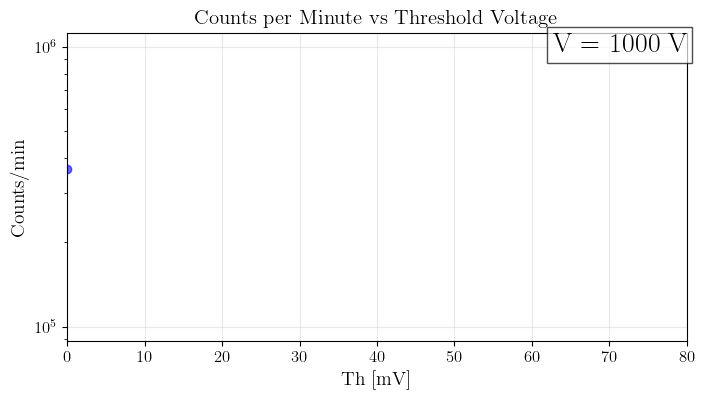

In [11]:
# Plot the data - questo per i "plateau" (non ce li aspettiamo per questo rivelatore) : 
dataframes = [df_1]
voltages = [1000, ]  # Corresponding voltages for each DataFrame


for i, (df, voltage) in enumerate(zip(dataframes, voltages), start=1):
    plt.figure(figsize=(8, 4))
    
    # Plot the data
    plt.plot(
        df['Th [meV]'], df['N_singole_1'],
        linestyle='-', marker='o', linewidth=1.7, color='b', alpha=0.6
    )
    
    # Add titles and labels
    plt.title('Counts per Minute vs Threshold Voltage', fontsize=15)
    plt.xlabel('Th [mV]', fontsize=14)
    plt.ylabel('Counts/min', fontsize=14)
    
    # Use a logarithmic scale for the y-axis
    plt.yscale('log')
    
    # Grid and tick settings
    plt.grid(True, color='lightgray', alpha=0.5)
    plt.xticks(
        ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80],
        fontsize=12
    )
    plt.yticks(fontsize=12)
    
    plt.text(
        1, 1, f'V = {voltage} V', 
        fontsize=20, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'),
        transform=plt.gca().transAxes, ha='right', va='top'  # Position at the upper-right corner
    )
    
    # Show the plot
    plt.show()

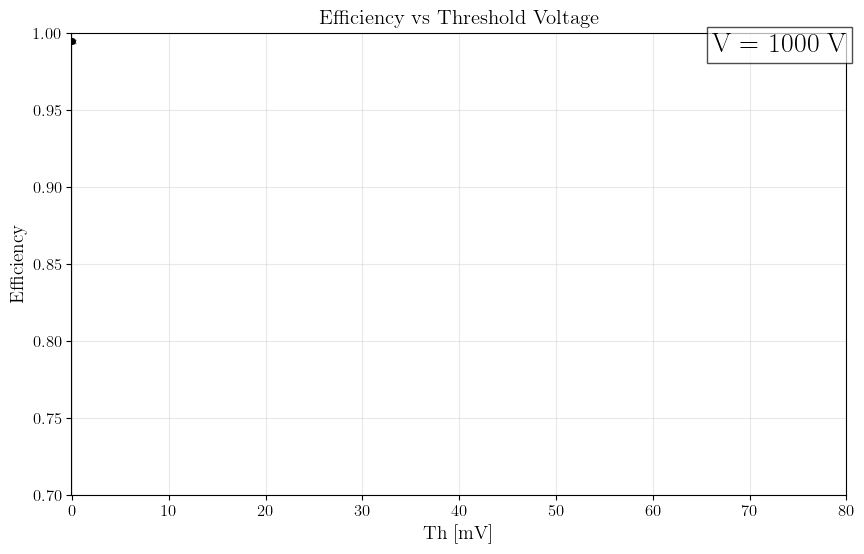

In [12]:
# List of DataFrames and corresponding voltages
dataframes = [df_1]
voltages = [1000]  # Corresponding voltages for each DataFrame

for i, (df, voltage) in enumerate(zip(dataframes, voltages), start=1):
    plt.figure(figsize=(10, 6))
    
    # Plot with error bars
    plt.errorbar(
        df['Th [meV]'], df['epsilon_1'], 
        yerr=df['sigma_epsilon_1'],  # Error bar values
        fmt='o', markersize=4, linewidth=0, color='black',  # Marker and line settings
        ecolor='gray', elinewidth=1, capsize=3  # Error bar style
    )
    
    # Add titles and labels
    plt.title('Efficiency vs Threshold Voltage', fontsize=15)
    plt.xlabel('Th [mV]', fontsize=14)
    plt.ylabel('Efficiency', fontsize=14)
    
    # Grid and tick settings
    plt.grid(True, color='lightgray', alpha=0.5)
    plt.xticks(
        ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80],
        fontsize=12
    )
    plt.yticks(fontsize=12)
    
    # Add voltage annotation as a small box
    plt.text(
        1, 1, f'V = {voltage} V', 
        fontsize=20, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'),
        transform=plt.gca().transAxes, ha='right', va='top'  # Position at the upper-right corner
    )
    
    # Show the plot
    plt.ylim(0.7, 1)
    plt.show()



# Summary Plots

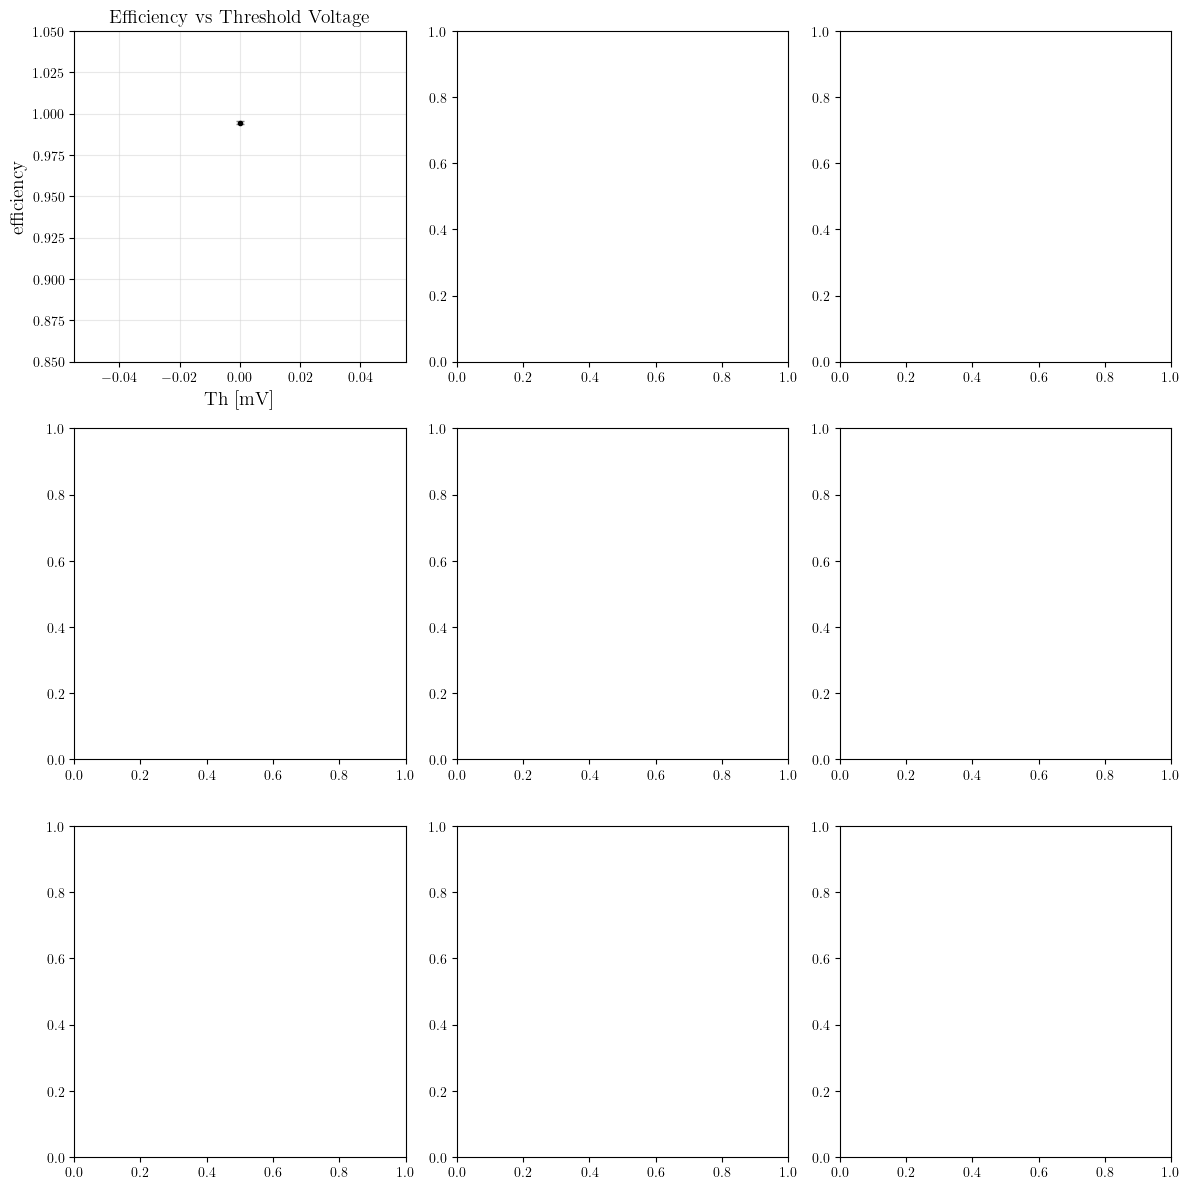

In [13]:
FONT_SIZE = 14
FONT_SIZE = 14
MARKER_SIZE = 3
LINE_WIDTH = 1
GRID_COLOR = 'lightgray'
GRID_ALPHA = 0.5

# List of dataframes and corresponding voltages
dataframes = [df_1] # Replace/add your actual dataframes here
voltages = [1000]  # Replace/add the corresponding voltage values

# Create subplots grid (1 row per dataframe)
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 12), sharex=False, sharey=False)

# Appiattisci gli assi per iterare facilmente
axes_flat = axes.flatten()
# Loop over dataframes and axes
for i, (df, V) in enumerate(zip(dataframes, voltages)):
        ax = axes_flat[i]

        ax.errorbar(df['Th [meV]'], df['epsilon_1'], markersize = MARKER_SIZE,
                yerr=df['sigma_epsilon_1'],   # Error bar values
                fmt='o', linewidth=0, color='black',  # Marker and line settings
                ecolor='gray', elinewidth=1, capsize=3)  # Error bar style
        
        ax.set_title('Efficiency vs Threshold Voltage', fontsize = FONT_SIZE)
        ax.set_xlabel('Th [mV]', fontsize = FONT_SIZE)
        ax.set_ylabel('efficiency', fontsize = FONT_SIZE)
        #ax.set_xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize = FONT_SIZE)
        # Uncomment if needed (comment the previous line): 
        # plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
        #ax.set_yticks(fontsize = FONT_SIZE)
        ax.set_ylim(0.85, 1.05)
        ax.grid(True, color='lightgray', alpha = 0.5)


# Adjust layout
plt.tight_layout()
plt.show()